<a href="https://colab.research.google.com/github/sbrockhaus/predict-housing/blob/master/housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import os
os.getcwd()

'/content'

In [0]:
# load data directly from python package 
#from sklearn.datasets import load_boston
#boston = load_boston()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [42]:
# load data and save it as pandas data frame
data = pd.read_csv('housing.csv')
data = pd.DataFrame(data)
#data.head()
#data.info()
data.describe()

,crime_rate,avg_number_of_rooms,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio,house_value
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,6.284059,3.794459,408.459406,18.461782,22.529901
std,8.608572,0.703195,2.107757,168.629992,2.162520,9.205991
min,0.009060,3.561000,1.129600,187.000000,12.600000,5.000000
25%,0.082210,5.885000,2.100000,279.000000,17.400000,17.000000
50%,0.259150,6.208000,3.199200,330.000000,19.100000,21.200000
75%,3.678220,6.625000,5.211900,666.000000,20.200000,25.000000
max,88.976200,8.780000,12.126500,711.000000,22.000000,50.000000


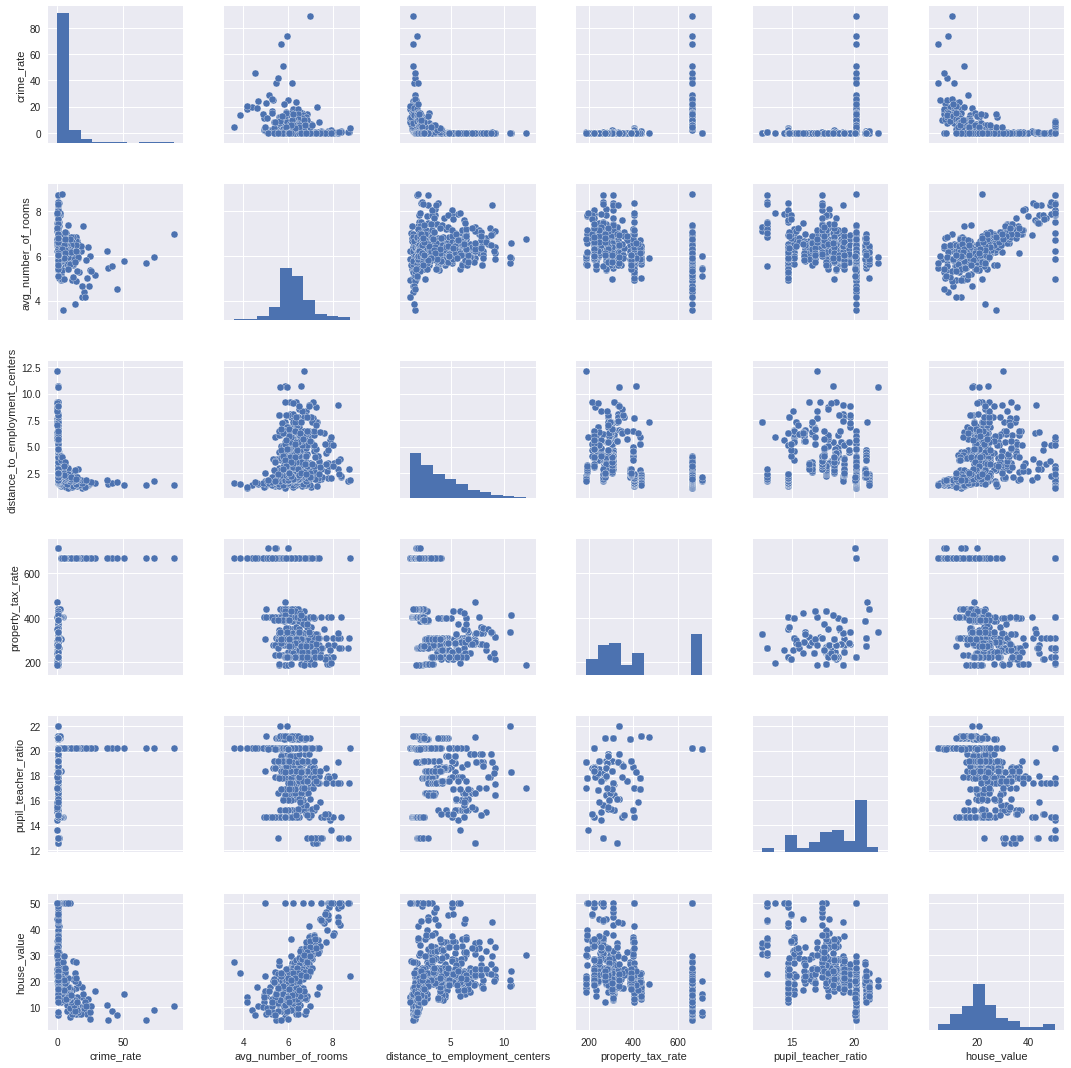

In [43]:
# look at data 
sns.pairplot(data)

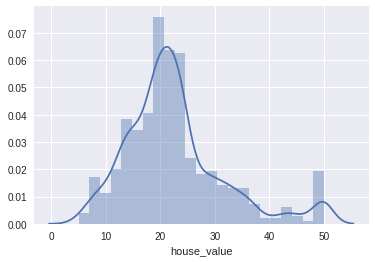

In [0]:
# look at response
sns.distplot(data['house_value'])

In [45]:
# look at pairwise correlations
data.corr()

,crime_rate,avg_number_of_rooms,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio,house_value
crime_rate,1.000000,-0.218978,-0.379627,0.582568,0.289394,-0.388249
avg_number_of_rooms,-0.218978,1.000000,0.205170,-0.291680,-0.355116,0.695365
distance_to_employment_centers,-0.379627,0.205170,1.000000,-0.534492,-0.232561,0.249896
property_tax_rate,0.582568,-0.291680,-0.534492,1.000000,0.460100,-0.468543
pupil_teacher_ratio,0.289394,-0.355116,-0.232561,0.460100,1.000000,-0.508411
house_value,-0.388249,0.695365,0.249896,-0.468543,-0.508411,1.000000


In [0]:
# create data frame with covariates and vector with response values
x = data.loc[: , data.columns != 'house_value']
y = data['house_value']

In [0]:
# do a split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=101)

In [48]:
# create trainig model 
from sklearn.linear_model import LinearRegression

# model fit 
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# get estimate of intercept
lm.intercept_

-3.495410268354906

In [50]:
# look at coefficient estimates 
pd.DataFrame(list(zip(data.columns, lm.coef_)), columns=['features', 'estimatedcoefs'])
#list(zip(data.columns, lm.coef_))

,features,estimatedcoefs
0,crime_rate,-0.112616
1,avg_number_of_rooms,6.847178
2,distance_to_employment_centers,-0.019951
3,property_tax_rate,-0.011029
4,pupil_teacher_ratio,-0.678621


In [51]:
# get R^2 on test set 
lm.score(x_test, y_test)

0.5872961661183782

In [0]:
# get predictions on test set 
predictions = lm.predict(x_test)

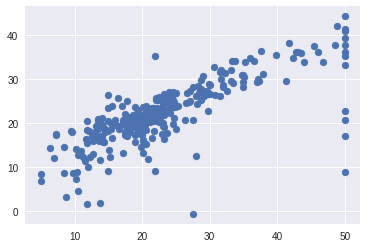

In [53]:
# visualize obseved and predicted values
plt.scatter(y_test, predictions)

In [54]:
# compute MSE for training and test data 
mse_train = np.mean( (y_train - lm.predict(x_train)) ** 2 )
mse_test = np.mean( (y_test - predictions) ** 2 )
print("MSE train: ", round(mse_train, 2), "; MSE test: ", round(mse_test, 2))

MSE train:  26.64 ; MSE test:  38.94


Text(0,0.5,'residuals')

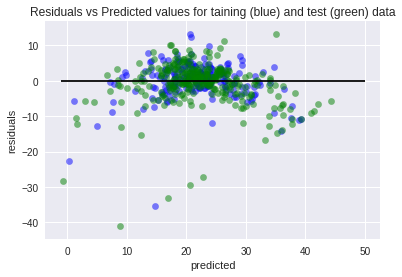

In [55]:
# plot of residuals vs predicted 
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=-1, xmax=50)
plt.title('Residuals vs Predicted values for taining (blue) and test (green) data')
plt.xlabel('predicted')
plt.ylabel('residuals')

In [56]:
# create model on whole data set 
from sklearn.linear_model import LinearRegression

# model fit 
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# save model object 
from sklearn.externals import joblib
joblib.dump(lm, 'model.pkl')

['model.pkl']

In [58]:
# get R squared
lm.score(x, y)

0.6067850198780185

In [59]:
# compute residual sum of squares 
epsilon2 = (y - lm.predict(x)) ** 2
sqr = np.sum(epsilon2)
sqr

# compute degrees of freedom of lm as n - p 
df = (x.shape[0] + 1) - (x.shape[1] + 1)
df

# compute standard deviation of regression errors
std = (sqr/df) ** (0.5)
std

5.795832833900312

In [79]:
# use regression model to predict for new observations
query = {"crime_rate": [3.6, 3.6], 
         "avg_number_of_rooms": [6.0, 7.0], 
         "distance_to_employment_centers": [3.8, 3.8], 
         "property_tax_rate": [400.0, 400.0], 
         "pupil_teacher_ratio": [18, 18]}
query = pd.DataFrame.from_dict(query)
query

,avg_number_of_rooms,crime_rate,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio
0,6.0,3.6,3.8,400.0,18
1,7.0,3.6,3.8,400.0,18


In [80]:
lm.predict(query) 

array([3.1780352 , 3.03753254])